In [1]:
""" dictionary records of current weather obs from UW ATG """

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data-.csv', low_memory=False, skiprows=1)
atg_obs

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [3]:
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
atg_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,1999-07-30 00:09:00,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,1999-07-30 00:10:00,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,1999-07-30 00:11:00,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,1999-07-30 00:12:00,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,1999-07-30 00:13:00,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [134]:
atg_obs = atg_obs.loc[(atg_obs['datetime_UTC']>=dt.datetime(2015,5,1))].copy()

In [136]:
no_erros_obs = atg_obs.loc[(atg_obs['Rain']!='M')&(atg_obs['Temperature']!='M')&(atg_obs['Pressure']!='M')&(atg_obs['Relhum']!='M')&(atg_obs['Relhum']!='0.00.')].copy()
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)
no_erros_obs['Temperature'] = no_erros_obs['Temperature'].astype(float)
no_erros_obs['Pressure'] = no_erros_obs['Pressure'].astype(float)
no_erros_obs['Relhum'] = no_erros_obs['Relhum'].astype(float)

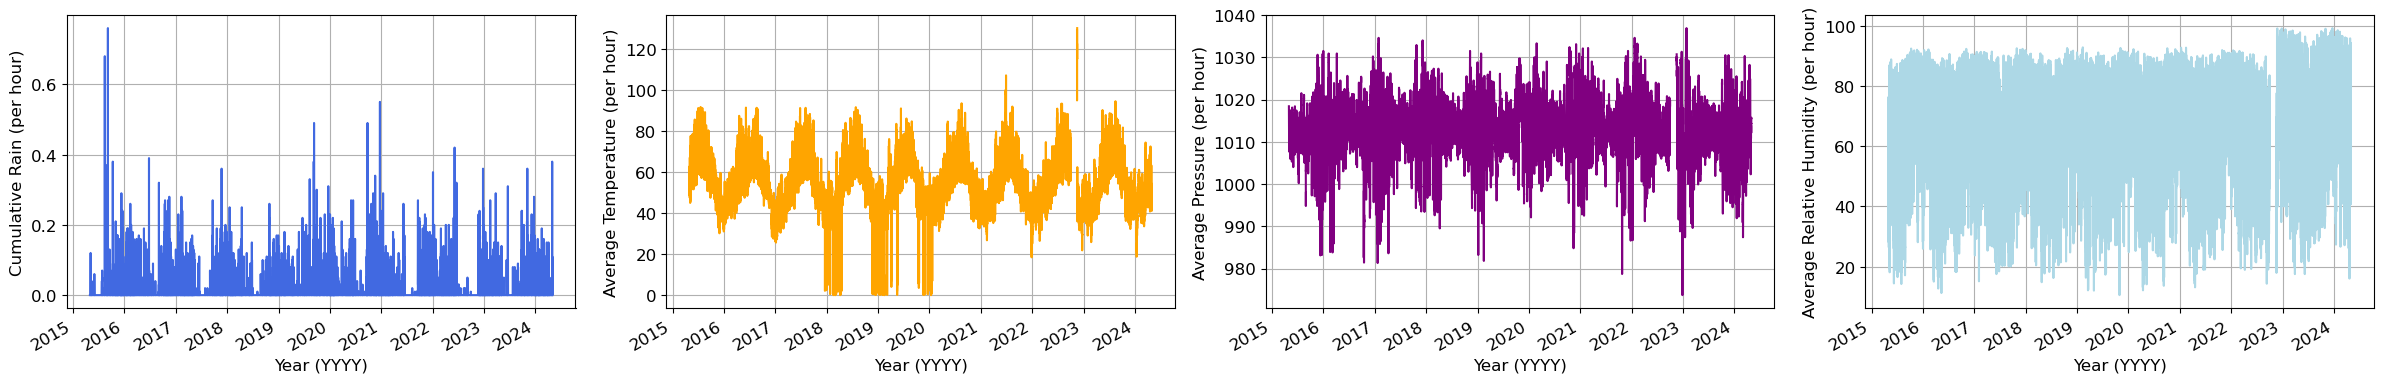

In [222]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1H')

summed_press_each_period = first_obs_each_period['Pressure'].first()
summed_relhum_each_period = first_obs_each_period['Relhum'].first()
summed_temp_each_period = first_obs_each_period['Temperature'].first()
summed_rain_each_period = first_obs_each_period['Rain'].sum()

plt.figure(figsize=(24,4))

plt.subplot(1,4,1)
plt.rcParams.update({'font.size':12})
plt.plot(summed_rain_each_period.index, summed_rain_each_period.values, color='royalblue')
plt.grid(which='both')
plt.ylabel('Cumulative Rain (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,2)
plt.rcParams.update({'font.size':12})
plt.plot(summed_temp_each_period.index, summed_temp_each_period.values, color='orange')
plt.grid(which='both')
plt.ylabel('Average Temperature (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,3)
plt.rcParams.update({'font.size':12})
plt.plot(summed_press_each_period.index, summed_press_each_period.values, color='purple')
plt.grid(which='both')
plt.ylabel('Average Pressure (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,4)
plt.rcParams.update({'font.size':12})
plt.plot(summed_relhum_each_period.index, summed_relhum_each_period.values, color='lightblue')
plt.grid(which='both')
plt.ylabel('Average Relative Humidity (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [516]:
no_erros_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
8202260,2015-05-01 00:00:00,2.457144e+06,2015-05-01,00:00,60.7,36.400000,40.3,5.200000,6.300000,207,1018.4,367.5,585.42,0.0
8202261,2015-05-01 00:01:00,2.457144e+06,2015-05-01,00:01,60.7,36.100000,39.7,4.300000,5.000000,217,1018.2,357.1,585.42,0.0
8202262,2015-05-01 00:02:00,2.457144e+06,2015-05-01,00:02,60.6,36.500000,40.4,4.200000,4.900000,218,1018.3,345.8,585.42,0.0
8202263,2015-05-01 00:03:00,2.457144e+06,2015-05-01,00:03,60.6,35.900000,39.6,5.500000,5.900000,216,1018.3,347.5,585.42,0.0
8202264,2015-05-01 00:04:00,2.457144e+06,2015-05-01,00:04,60.5,36.000000,40.0,6.000000,6.600000,218,1018.2,362.9,585.42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.3,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.0
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.1,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.0
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.0,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.0
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.0,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.0


In [223]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1H')
summed_rain_each_period = first_obs_each_period['Rain'].sum()

In [224]:
lightrainfall_times = summed_rain_each_period[(summed_rain_each_period<0.10)&(summed_rain_each_period>0.0)]
moderaterainfall_times = summed_rain_each_period[(summed_rain_each_period<0.30)&(summed_rain_each_period>0.10)]
heavyrainfall_times = summed_rain_each_period[(summed_rain_each_period>0.30)]
lightrainfall_times

datetime_UTC
2015-05-05 13:00:00    0.09
2015-05-05 15:00:00    0.01
2015-05-05 21:00:00    0.02
2015-05-05 23:00:00    0.01
2015-05-06 00:00:00    0.03
                       ... 
2024-04-29 13:00:00    0.05
2024-04-29 14:00:00    0.01
2024-04-29 20:00:00    0.01
2024-04-30 09:00:00    0.01
2024-04-30 13:00:00    0.01
Name: Rain, Length: 7756, dtype: float64

In [405]:
rain_thresh = 0.1
summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)].dropna().sort_values()

datetime_UTC
2019-01-07 02:00:00     0.3
2018-11-22 22:00:00     0.7
2018-11-27 08:00:00     0.9
2018-11-27 09:00:00     1.1
2017-12-19 15:00:00     2.1
                       ... 
2019-08-02 10:00:00    67.8
2021-09-18 05:00:00    68.1
2019-07-16 05:00:00    68.4
2017-05-04 23:00:00    70.8
2019-09-13 03:00:00    71.2
Name: Temperature, Length: 970, dtype: float64

In [520]:
summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)]

datetime_UTC
2015-05-05 20:00:00    54.2
2015-05-06 01:00:00    47.9
2015-08-14 20:00:00    62.5
2015-08-14 21:00:00    59.4
2015-08-14 22:00:00    59.8
                       ... 
2024-04-03 07:00:00    45.6
2024-04-29 10:00:00    46.1
2024-04-29 11:00:00    43.4
2024-04-30 00:00:00    50.7
2024-04-30 01:00:00    47.9
Name: Temperature, Length: 970, dtype: float64

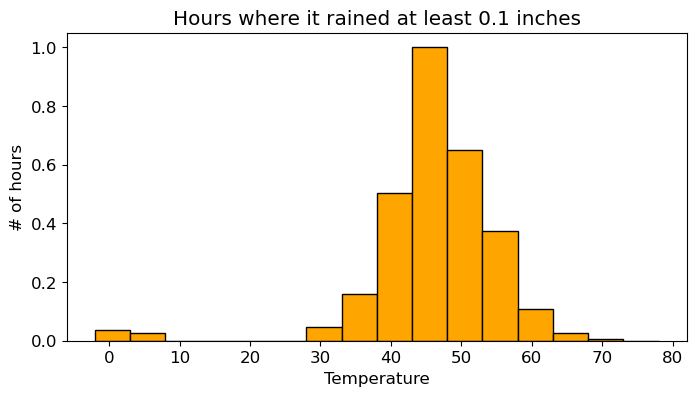

In [532]:
bin_wdth = 5
rain_counts, temps = np.histogram(summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)], bins=np.arange(0,80+bin_wdth,bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,80,bin_wdth)+0.5, width=bin_wdth, height=rain_counts/rain_counts.max(), facecolor='orange', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 80+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Temperature')
plt.show()

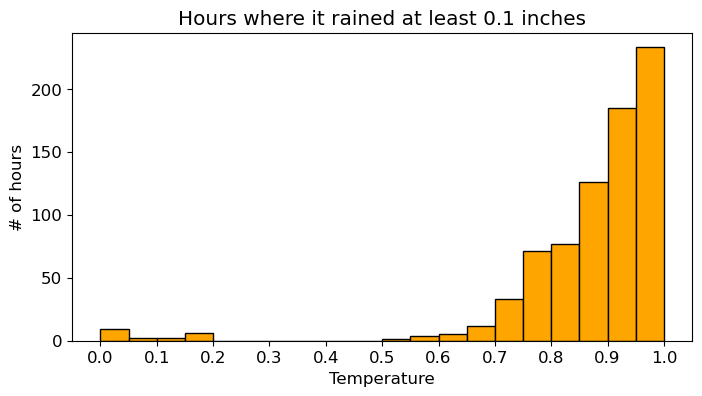

In [533]:
vals = summed_temp_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth,bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,1,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='orange', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 1+bin_wdth, 0.1))
plt.ylabel('# of hours')
plt.xlabel('Temperature')
plt.show()

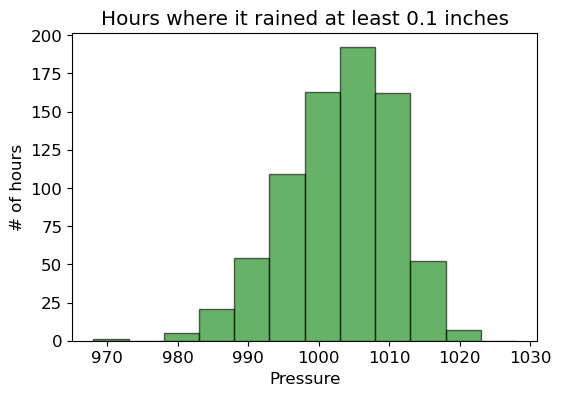

In [534]:
bin_wdth = 5
rain_counts, temps = np.histogram(summed_press_each_period.loc[(summed_rain_each_period>rain_thresh)].dropna(), bins=np.arange(970,1030+bin_wdth, bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(970,1030, bin_wdth)+0.5, width=bin_wdth, height=rain_counts, facecolor='green', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(970, 1030+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Pressure')
plt.show()

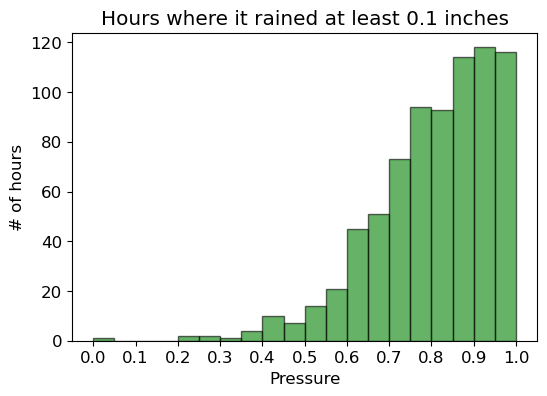

In [535]:
vals = summed_press_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth, bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,1, bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='green', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 1+bin_wdth, 2*bin_wdth))
plt.ylabel('# of hours')
plt.xlabel('Pressure')
plt.show()

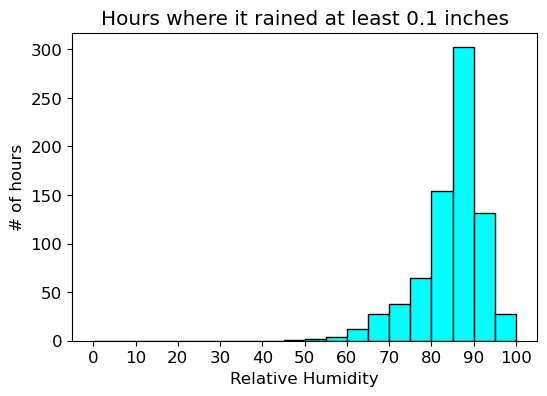

In [536]:
bin_wdth = 5
rain_counts, temps = np.histogram((summed_relhum_each_period.loc[(summed_rain_each_period>rain_thresh)].dropna()), bins=np.arange(0,100+bin_wdth,bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,100,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='cyan', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 100+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Relative Humidity')
plt.show()

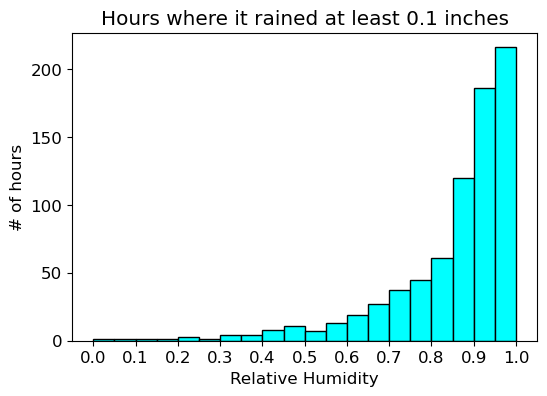

In [537]:
vals = summed_relhum_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth,bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,0.99,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='cyan', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('# of hours')
plt.xlabel('Relative Humidity')
plt.show()

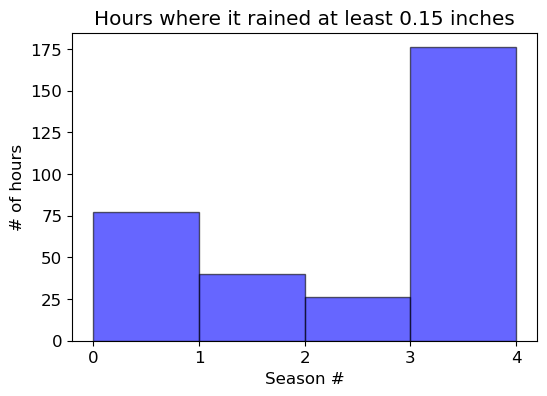

array([ 77,  40,  26, 176])

In [332]:
rain_counts, months = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month // 3, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 5))
plt.ylabel('# of hours')
plt.xlabel('Season #')
plt.show()
rain_counts

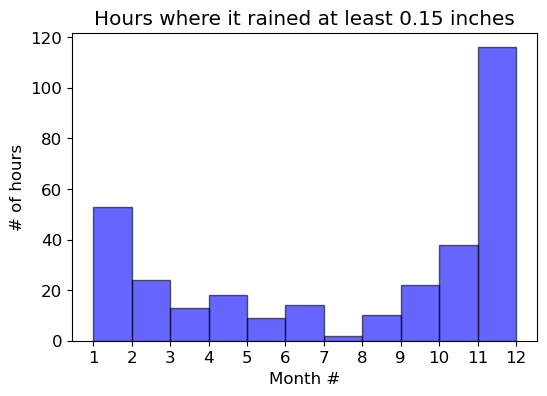

array([ 53,  24,  13,  18,   9,  14,   2,  10,  22,  38, 116])

In [333]:
rain_counts, months = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month, bins=np.arange(1,13))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(1,12)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(1, 13))
plt.ylabel('# of hours')
plt.xlabel('Month #')
plt.show()
rain_counts

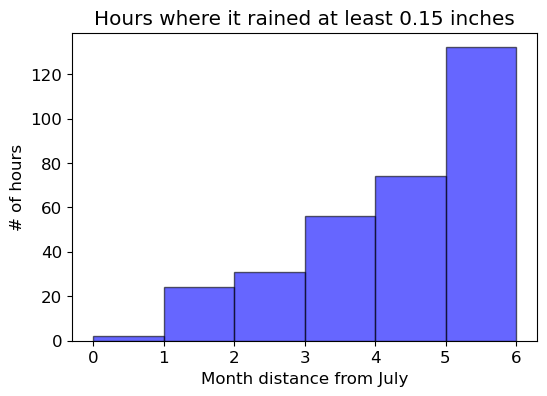

array([  2,  24,  31,  56,  74, 132])

In [345]:
rain_counts, months = np.histogram(np.abs(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month - 7), bins=np.arange(0,7))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,6)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 7))
plt.ylabel('# of hours')
plt.xlabel('Month distance from July')
plt.show()
rain_counts

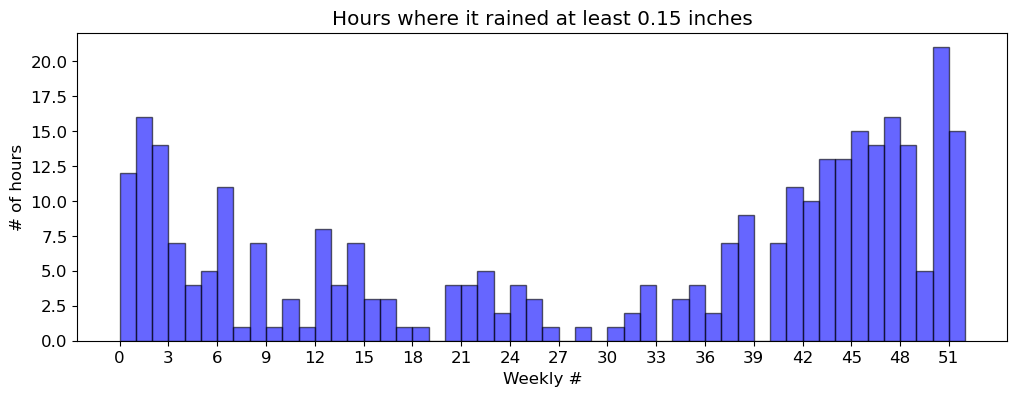

In [351]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 7, bins=np.arange(0,53))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,52)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 53, 3))
plt.ylabel('# of hours')
plt.xlabel('Weekly #')
plt.show()

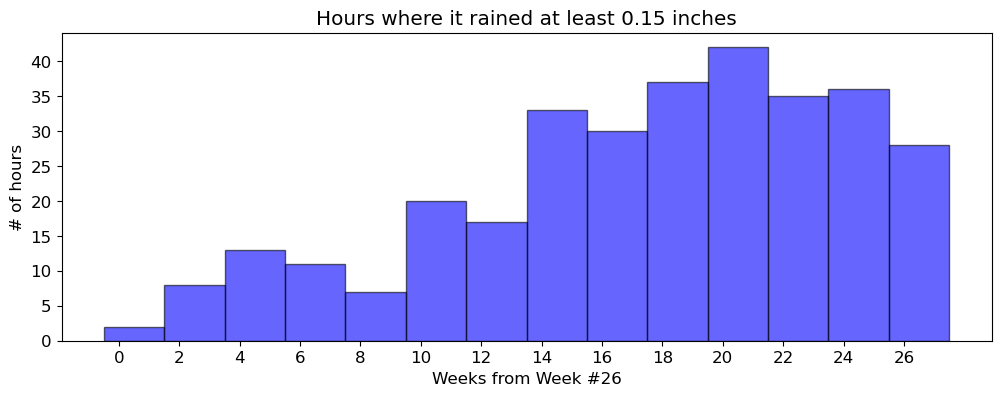

In [364]:
bin_wdth = 2
rain_counts, doy = np.histogram(np.abs((pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 7) - 27), bins=np.arange(0,28+bin_wdth,bin_wdth))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,27,bin_wdth)+0.5, width=bin_wdth, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 28,bin_wdth))
plt.ylabel('# of hours')
plt.xlabel('Weeks from Week #26')
plt.show()

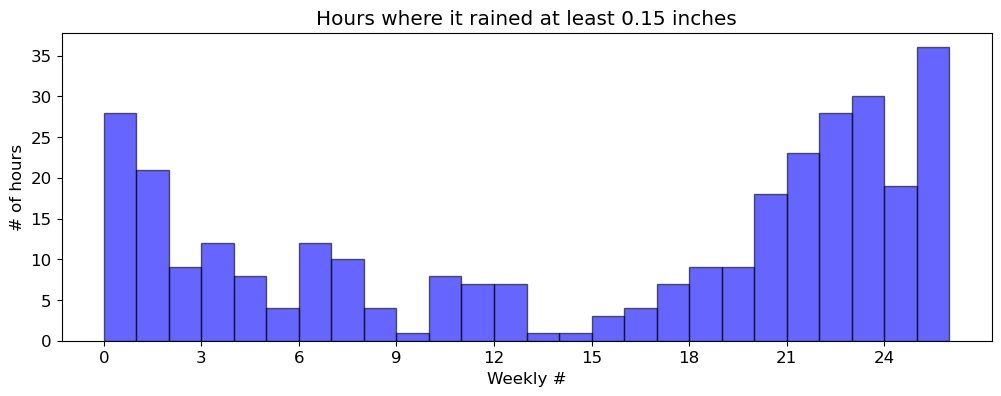

In [356]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 14, bins=np.arange(0,27))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,26)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 27, 3))
plt.ylabel('# of hours')
plt.xlabel('Weekly #')
plt.show()

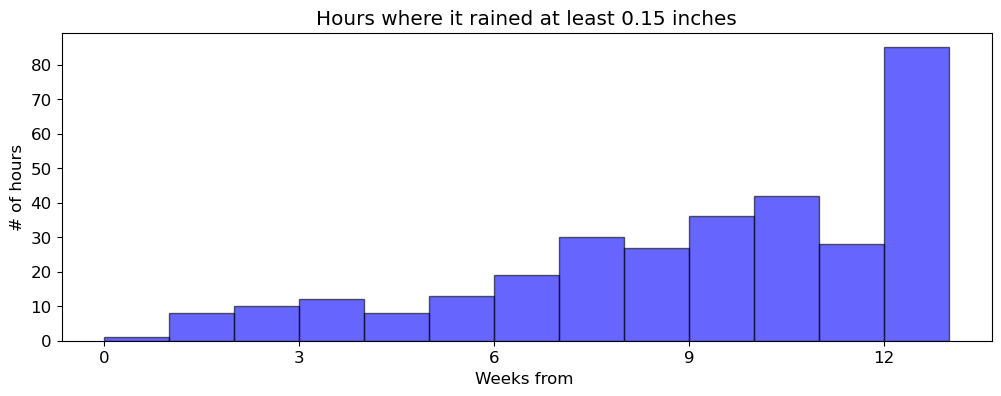

In [354]:
rain_counts, doy = np.histogram(np.abs((pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 14) - 13), bins=np.arange(0,14))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,13)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 14, 3))
plt.ylabel('# of hours')
plt.xlabel('Weeks from ')
plt.show()

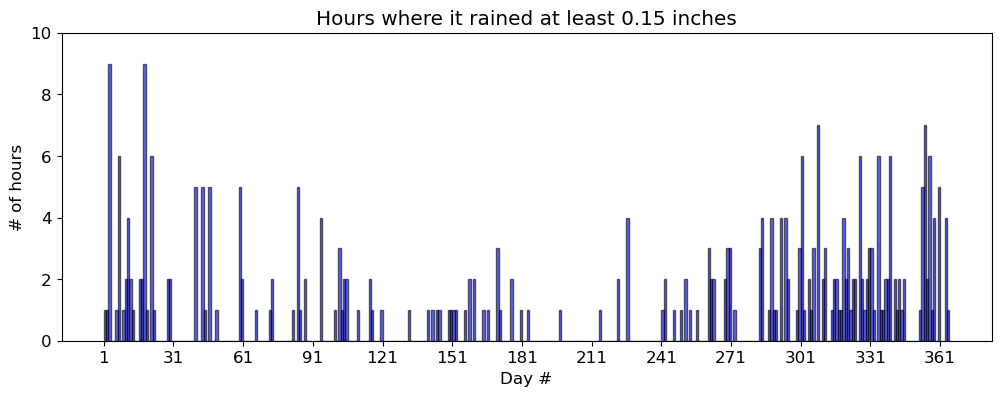

In [336]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear, bins=np.arange(1,366))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(1,365)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(1, 366, 30))
plt.yticks(np.arange(0, rain_counts.max()+2, 2))
plt.ylabel('# of hours')
plt.xlabel('Day #')
plt.show()

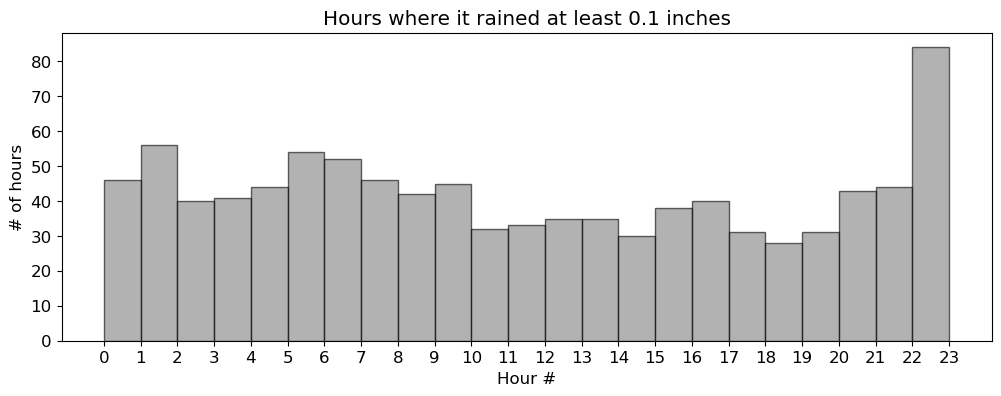

array([46, 56, 40, 41, 44, 54, 52, 46, 42, 45, 32, 33, 35, 35, 30, 38, 40,
       31, 28, 31, 43, 44, 84])

In [540]:
rain_counts, times = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour, bins=np.arange(0,24))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,23)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 24))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

In [556]:
((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour -1)%24

Index([19,  0, 19, 20, 21, 22, 12,  2,  3,  4,
       ...
       20, 23,  3,  4,  5,  6,  9, 10, 23,  0],
      dtype='int32', name='datetime_UTC', length=970)

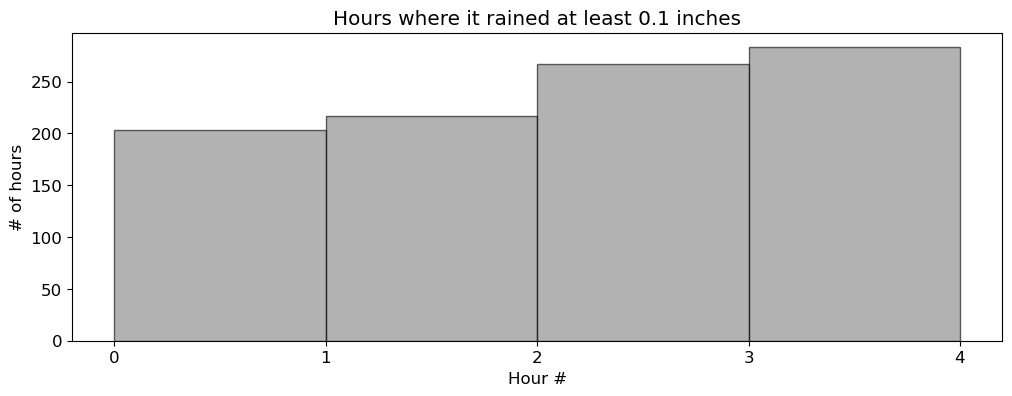

array([203, 217, 267, 283])

In [563]:
rain_counts, times = np.histogram(pd.DatetimeIndex((((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour - 10)%24)//6), bins=np.arange(0,5))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 5))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

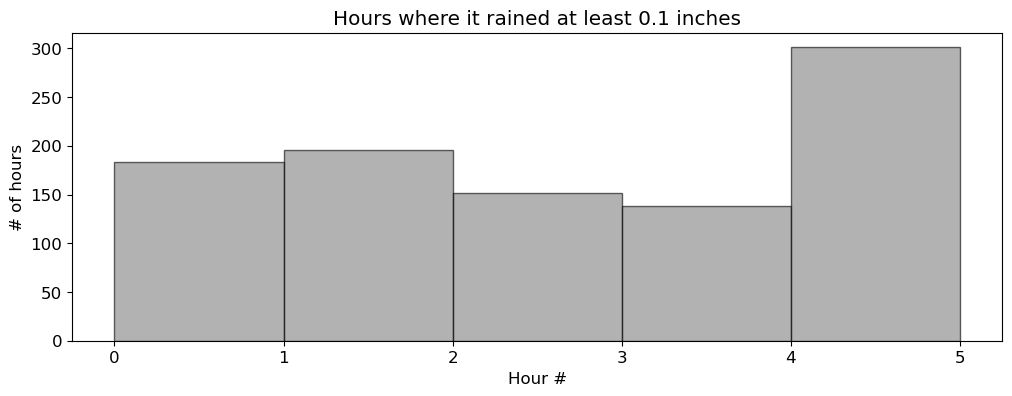

array([183, 196, 152, 138, 301])

In [542]:
rain_counts, times = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour, bins=np.arange(0,6))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,5)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 6))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

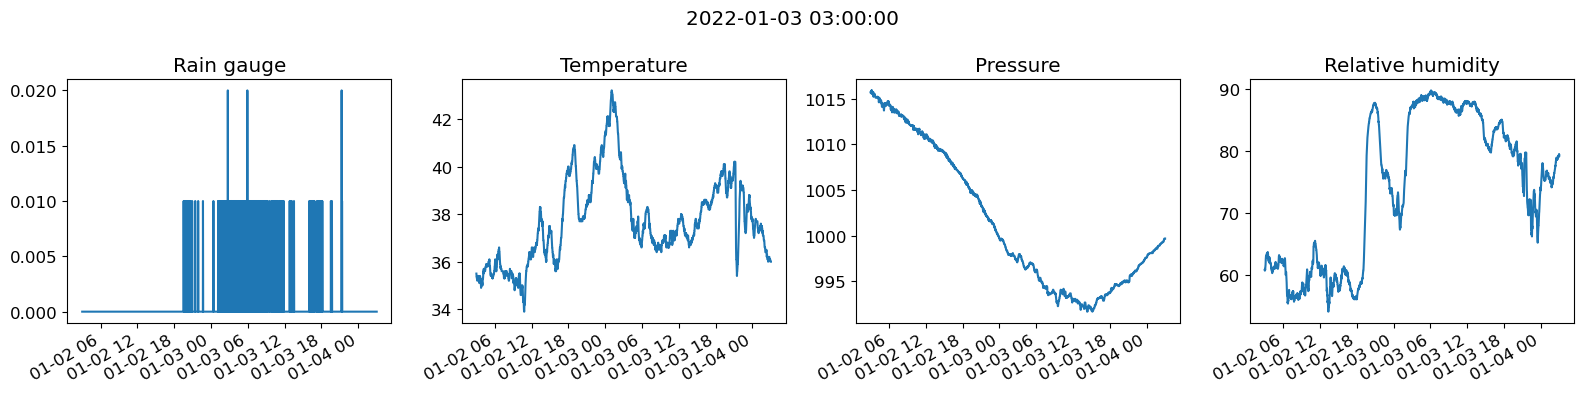

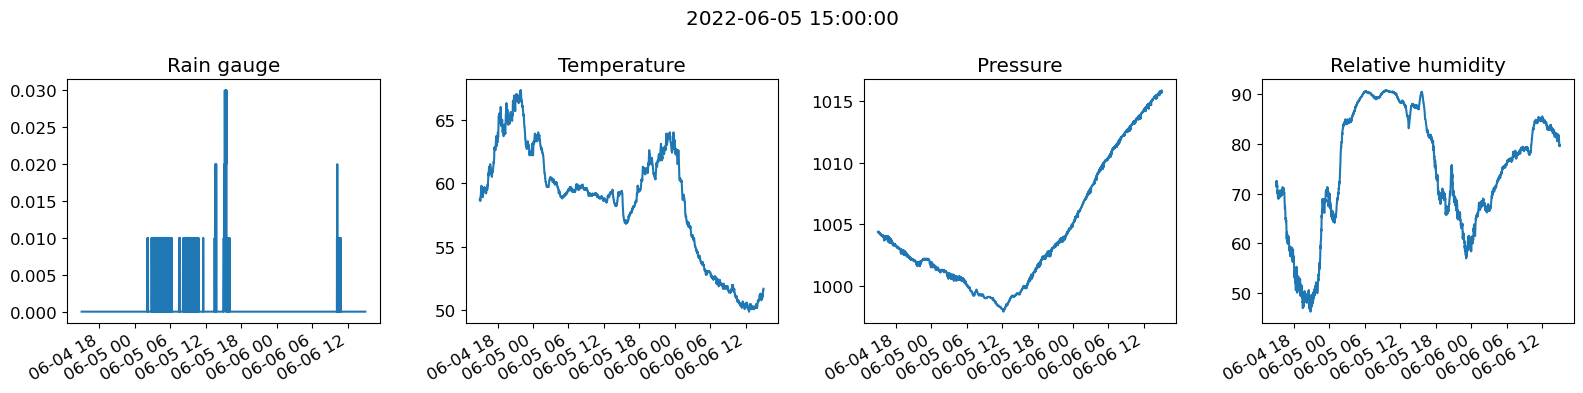

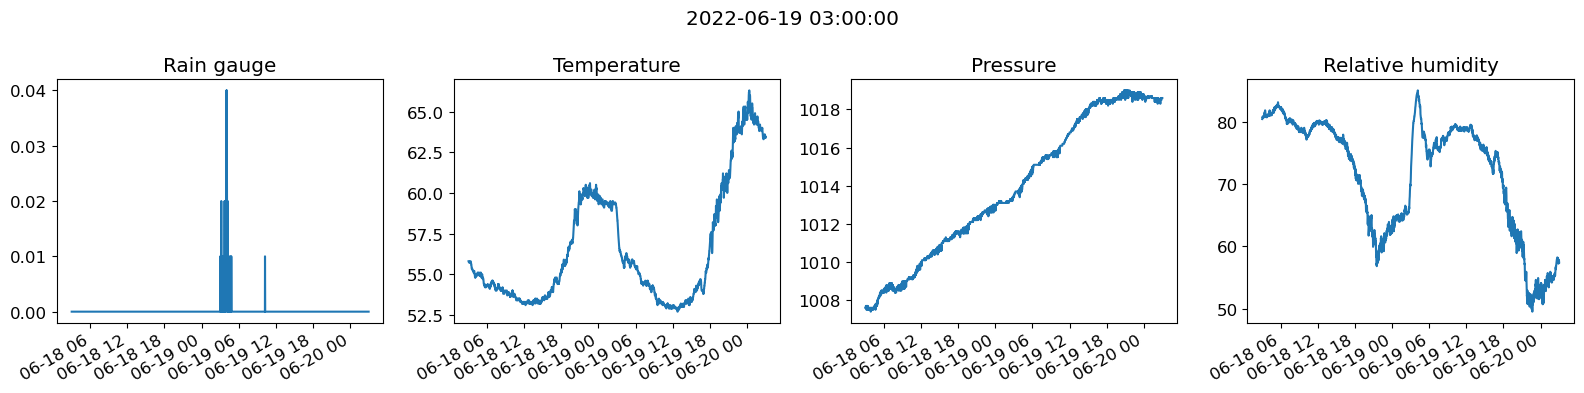

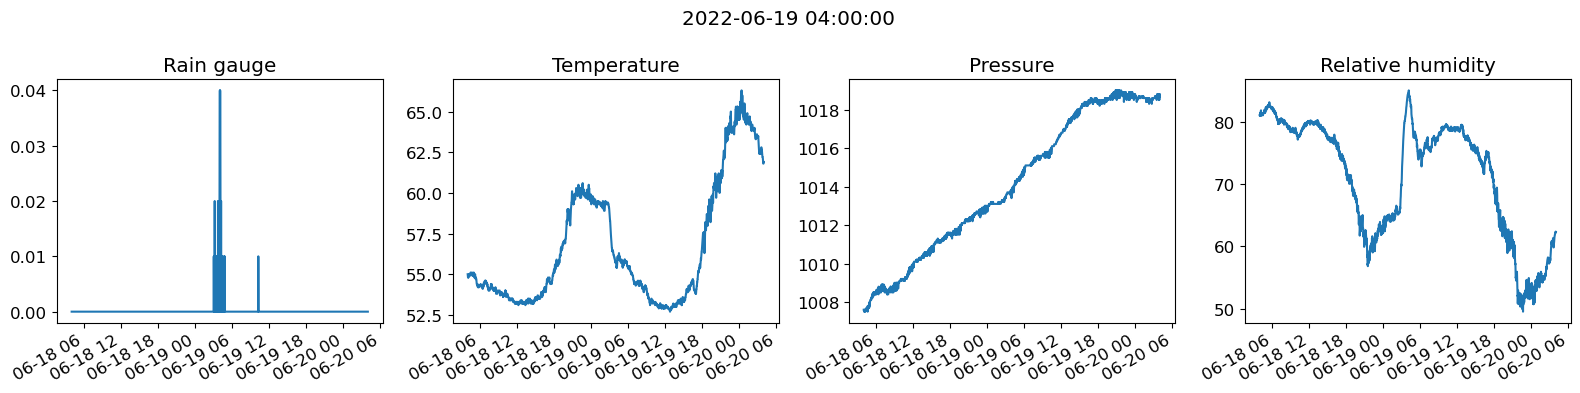

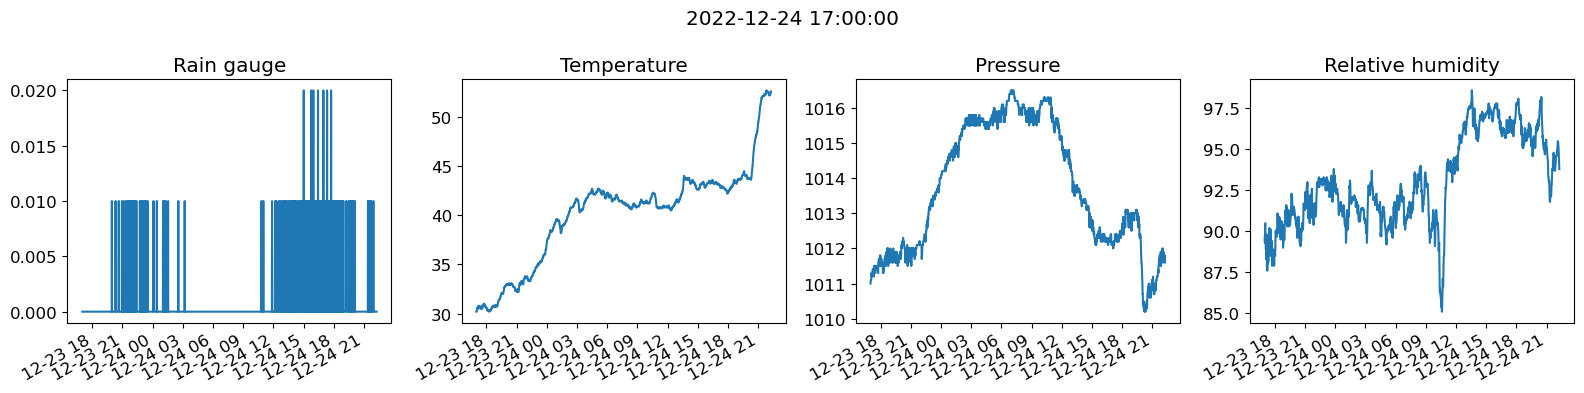

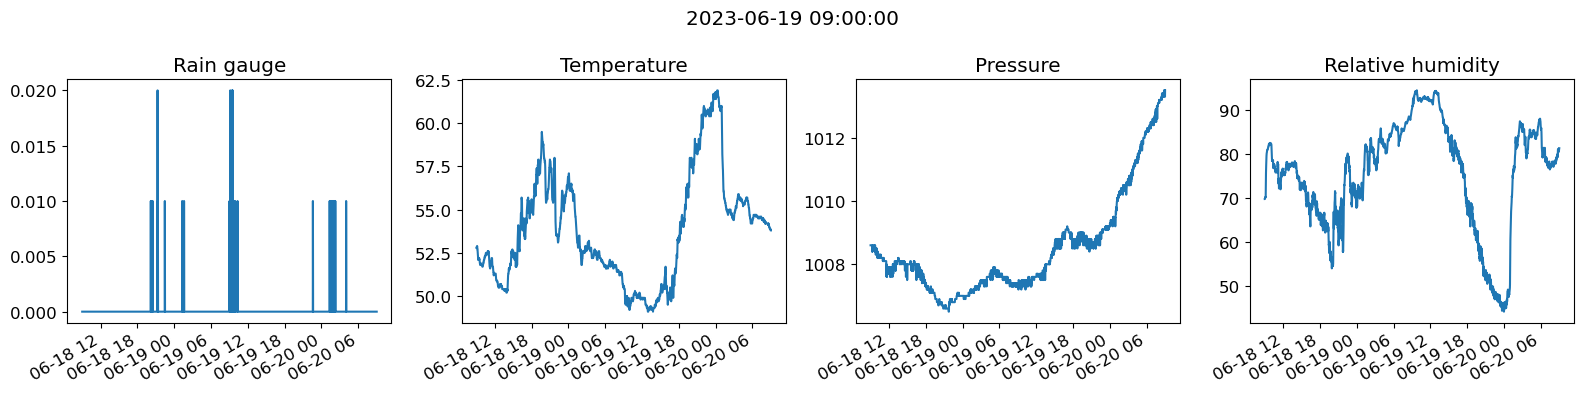

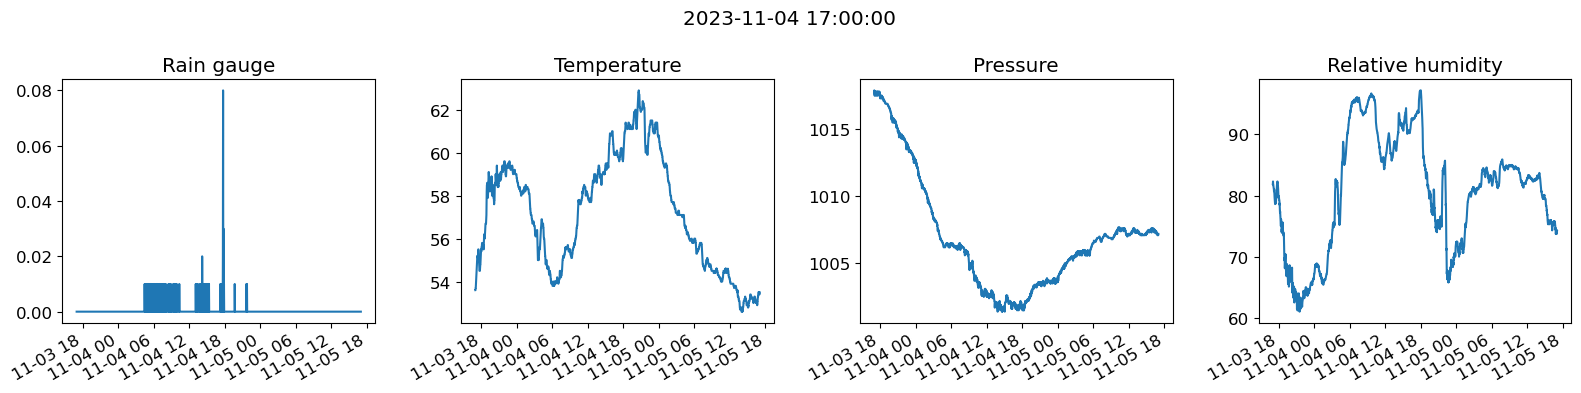

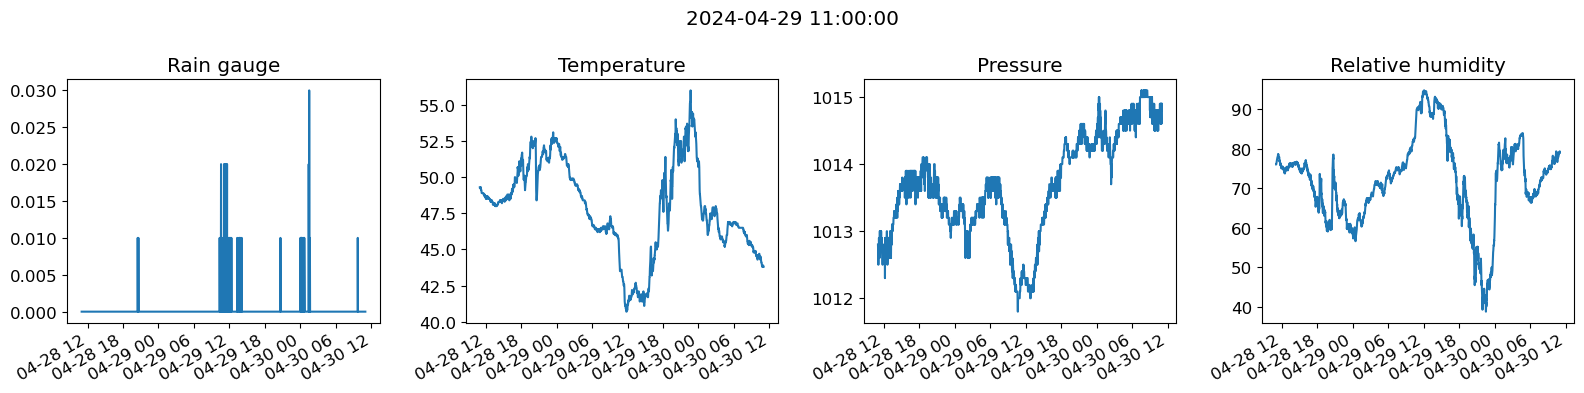

In [27]:
dt_obs = no_erros_obs.set_index('datetime_UTC')
for rain_dt in heavyrainfall_times.index:
    event_df = dt_obs.loc[rain_dt - pd.Timedelta(hours=24):rain_dt + pd.Timedelta(hours=24)]
    plt.figure(figsize=(16,4))
    plt.suptitle(f'{rain_dt}')

    plt.subplot(141)
    plt.title('Rain gauge')
    plt.plot(event_df.index, event_df['Rain'])

    plt.subplot(142)
    plt.title('Temperature')
    plt.plot(event_df.index, event_df['Temperature'])

    plt.subplot(143)
    plt.title('Pressure')
    plt.plot(event_df.index, event_df['Pressure'])

    plt.subplot(144)
    plt.title('Relative humidity')
    plt.plot(event_df.index, event_df['Relhum'])
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()